In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [18]:

# Load the data
data_path = 'C:/Users/filip/OneDrive - Vysoká škola ekonomická v Praze/Plocha/DATA X/data_for_model.pck'
data = pd.read_pickle(data_path)

# Define the target variable
target_variable = 'price'

# Drop rows with missing target variable values
data = data.dropna(subset=[target_variable])

# Calculate IQR
Q1 = data.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = data.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers using IQR
data_cleaned = data[~((data.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
                      (data.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original dataset shape: {data.shape}")
print(f"Cleaned dataset shape: {data_cleaned.shape}")

# Split features and target variable
X = data_cleaned.drop(target_variable, axis=1)
y = data_cleaned[target_variable]

# Remove columns with any missing values
X = X.dropna(axis=1, how='any')

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Calculate the R² score
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Linear Regression R²: {r2_lr:.4f}')




Original dataset shape: (8029, 28)
Cleaned dataset shape: (2648, 28)
Linear Regression R²: 0.4038


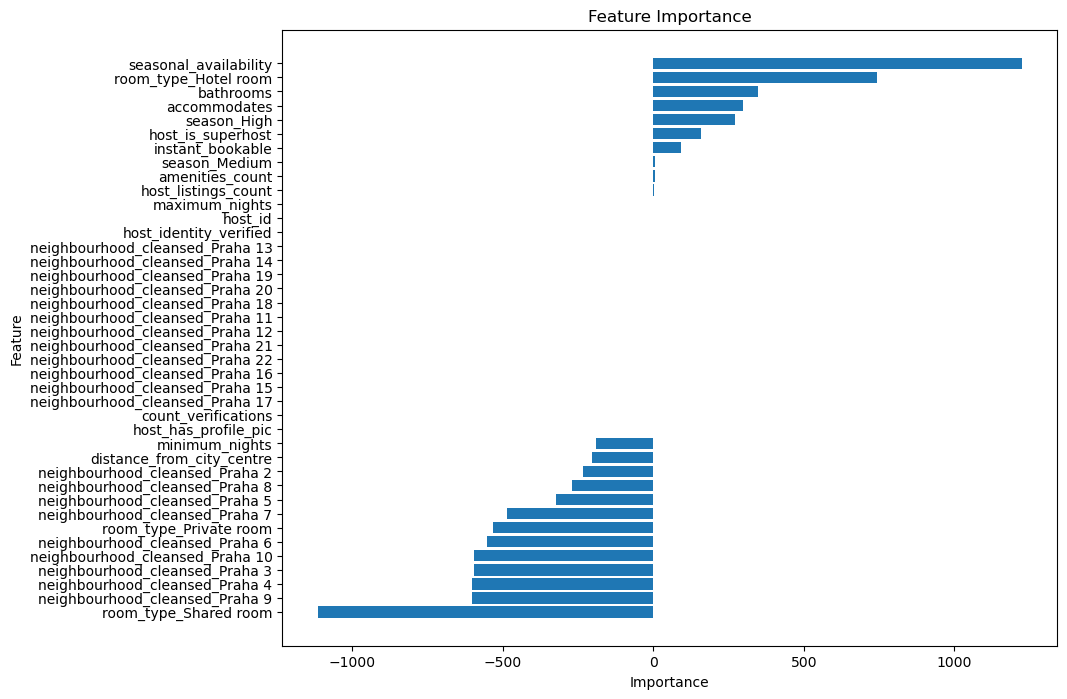

,Feature,Importance
12,seasonal_availability,1224.351062
36,room_type_Hotel room,744.007083
6,bathrooms,346.629124
5,accommodates,296.644120
39,season_High,270.355373
1,host_is_superhost,159.877534
9,instant_bookable,91.066220
38,season_Medium,5.378172
10,amenities_count,4.722817
2,host_listings_count,3.930169


In [19]:
# display the importance of attributes
coefficients = lr.coef_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': coefficients})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

#
plt.figure(figsize=(10, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

#
feature_importances.head(10)